In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df = pd.read_csv('loans_full_schema.csv')
df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [190]:
def get_dummies(DATAFRAME,COLUMN):
    """replaces column with the split version"""
    filler_df= pd.get_dummies(DATAFRAME[COLUMN])
    
    columns = list(filler_df.columns)
    
    for _ in columns:
    
        j = 0
        
        DATAFRAME.insert((DATAFRAME.columns.get_loc(COLUMN))+j,_,filler_df[_])
    
        j=+1
    
    DATAFRAME = DATAFRAME.drop(COLUMN, axis = 'columns')
    
    return DATAFRAME

get_dummies(df,'homeownership')
            

,emp_title,emp_length,state,MORTGAGE,OWN,RENT,annual_income,verified_income,debt_to_income,annual_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,True,False,False,90000.0,Verified,18.01,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,False,False,True,40000.0,Not Verified,5.04,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,False,False,True,40000.0,Source Verified,21.15,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,False,False,True,30000.0,Not Verified,10.16,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,False,False,True,35000.0,Verified,57.96,57000.0,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,False,False,True,108000.0,Source Verified,22.28,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,True,False,False,121000.0,Verified,32.38,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,True,False,False,67000.0,Verified,45.26,107000.0,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,True,False,False,80000.0,Source Verified,11.99,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [215]:
def sub_grade_reverse(DATAFRAME,COLUMN): # This is converting the sub_grade column into int, LOWER IS BETTER
    #sub_grade is ordinal so this was simple enough
    #I'm not sure what you would call this kind of pre-proccessing

    alphabet = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ','$',',']
        
    i = 0
        
    while i < 29:
        DATAFRAME[COLUMN] = np.where(DATAFRAME[COLUMN].str.contains(alphabet[i]), DATAFRAME[COLUMN].str.replace(alphabet[i], str(i)), DATAFRAME[COLUMN])
            
        i += 1

    DATAFRAME[COLUMN] = [int(x) for x in DATAFRAME[COLUMN]]
    
    return DATAFRAME

sub_grade_reverse(df,'sub_grade')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,23,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,21,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,31,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,23,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,33,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,42,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


2 c:
dealing with null values,

I believe there are no null values outside of the marrige thing.
We could just make a new list without those and perform operations on that.
Save OG list
Compared differences between those in joint vs those in similar positions or vs everyone else

we could also find a way to deal with a null value in a different column. 


In [234]:
df_single = df.drop(['annual_income_joint','verification_income_joint','debt_to_income_joint'],axis=1)
df_single

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,months_since_last_delinq,earliest_credit_line,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,0,38.0,2001,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,0,NaN,1996,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,0,28.0,2006,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,0,NaN,2007,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,0,NaN,2008,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,0,NaN,2008,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,4,9.0,1994,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,2,6.0,2004,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,0,NaN,1999,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [256]:
#def null_replace_df(DATAFRAME,COLUMN):
#
null_array = df['emp_title'].isna()



In [247]:
for i in null_index:
    print(i)

<function <lambda> at 0x0000019DE43AF160>


In [257]:
null_array

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: emp_title, Length: 10000, dtype: bool

In [261]:
df['emp_title'] = null_array
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,False,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,False,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,False,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,False,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,False,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,False,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,False,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [262]:
df.copy()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,False,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,False,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,False,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,False,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,False,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,False,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,False,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [263]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,False,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,False,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,False,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,False,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,False,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,False,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,False,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,False,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [264]:
df.dtypes

emp_title                              bool
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
annual_income_joint                 float64
verification_income_joint            object
debt_to_income_joint                float64
delinq_2y                             int64
months_since_last_delinq            float64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
months_since_90d_late               float64
current_accounts_delinq               int64
total_collection_amount_ever    

In [4]:
numbers_df = df.drop(['emp_title','verified_income','state','homeownership','verification_income_joint','disbursement_method','initial_listing_status'
                      ,'loan_status','issue_month','sub_grade','grade','loan_purpose','application_type'],axis=1)

In [329]:
columns = list(df.columns)

for i in list(df.dtypes):

    numbers_df = pd.DataFrame()
    
    j = 1
    k = 0
    if 'float' in str(i) or 'int' in str(i):
        j=+1,numbers_df.insert(j,columns[k],df[columns[j]])
    else:
        print('test')
    k =+1
        
    

test


IndexError: index 1 is out of bounds for axis 0 with size 0

In [327]:
numbers_df

,emp_title
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [6]:
numbers_df['loan_percent'] = numbers_df['paid_total']/numbers_df['loan_amount']

In [7]:
numbers_df.columns

Index(['emp_length', 'annual_income', 'debt_to_income', 'annual_income_joint',
       'debt_to_income_joint', 'delinq_2y', 'months_since_last_delinq',
       'earliest_credit_line', 'inquiries_last_12m', 'total_credit_lines',
       'open_credit_lines', 'total_credit_limit', 'total_credit_utilized',
       'num_collections_last_12m', 'num_historical_failed_to_pay',
       'months_since_90d_late', 'current_accounts_delinq',
       'total_collection_amount_ever', 'current_installment_accounts',
       'accounts_opened_24m', 'months_since_last_credit_inquiry',
       'num_satisfactory_accounts', 'num_accounts_120d_past_due',
       'num_accounts_30d_past_due', 'num_active_debit_accounts',
       'total_debit_limit', 'num_total_cc_accounts', 'num_open_cc_accounts',
       'num_cc_carrying_balance', 'num_mort_accounts',
       'account_never_delinq_percent', 'tax_liens', 'public_record_bankrupt',
       'loan_amount', 'term', 'interest_rate', 'installment', 'balance',
       'paid_total', '

In [10]:
numbers_df

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,loan_percent
0,3.0,90000.0,18.01,NaN,NaN,0,38.0,2001,6,28,...,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0,0.071405
1,10.0,40000.0,5.04,NaN,NaN,0,NaN,1996,1,30,...,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0,0.099824
2,3.0,40000.0,21.15,NaN,NaN,0,28.0,2006,4,31,...,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0,0.140900
3,1.0,30000.0,10.16,NaN,NaN,0,NaN,2007,0,4,...,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0,0.153375
4,10.0,35000.0,57.96,57000.0,37.66,0,NaN,2008,7,22,...,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0,0.101072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,NaN,NaN,0,NaN,2008,5,44,...,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0,0.123742
9996,8.0,121000.0,32.38,NaN,NaN,4,9.0,1994,1,28,...,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0,0.145631
9997,10.0,67000.0,45.26,107000.0,29.57,2,6.0,2004,0,18,...,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0,0.154027
9998,1.0,80000.0,11.99,NaN,NaN,0,NaN,1999,1,38,...,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0,0.119721


In [13]:
numbers_df.dropna(subset=['emp_length'])

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,loan_percent
0,3.0,90000.0,18.01,NaN,NaN,0,38.0,2001,6,28,...,28000,60,14.07,652.53,27015.86,1999.33,984.14,1015.19,0.0,0.071405
1,10.0,40000.0,5.04,NaN,NaN,0,NaN,1996,1,30,...,5000,36,12.61,167.54,4651.37,499.12,348.63,150.49,0.0,0.099824
2,3.0,40000.0,21.15,NaN,NaN,0,28.0,2006,4,31,...,2000,36,17.09,71.40,1824.63,281.80,175.37,106.43,0.0,0.140900
3,1.0,30000.0,10.16,NaN,NaN,0,NaN,2007,0,4,...,21600,36,6.72,664.19,18853.26,3312.89,2746.74,566.15,0.0,0.153375
4,10.0,35000.0,57.96,57000.0,37.66,0,NaN,2008,7,22,...,23000,36,14.07,786.87,21430.15,2324.65,1569.85,754.80,0.0,0.101072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,108000.0,22.28,NaN,NaN,0,NaN,2008,5,44,...,24000,36,7.35,744.90,21586.34,2969.80,2413.66,556.14,0.0,0.123742
9996,8.0,121000.0,32.38,NaN,NaN,4,9.0,1994,1,28,...,10000,36,19.03,366.72,9147.44,1456.31,852.56,603.75,0.0,0.145631
9997,10.0,67000.0,45.26,107000.0,29.57,2,6.0,2004,0,18,...,30000,36,23.88,1175.10,27617.65,4620.80,2382.35,2238.45,0.0,0.154027
9998,1.0,80000.0,11.99,NaN,NaN,0,NaN,1999,1,38,...,24000,36,5.32,722.76,21518.12,2873.31,2481.88,391.43,0.0,0.119721


Text(0, 0.5, 'loan amount ($)')

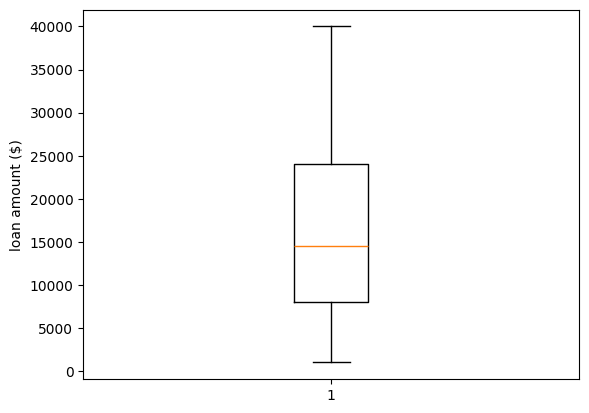

In [19]:
plt.boxplot(df['loan_amount'].dropna())
plt.ylabel('loan amount ($)')

2 Lambda functions

In [144]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,A4,Jan-2018,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,D3,Feb-2018,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,E2,Feb-2018,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,A1,Feb-2018,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0


In [56]:
plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
#second function is just the expanded function of this
#else: np.NaN
np.where(lambda x:  (RETURN) if x in plains else

In [69]:
if 'NH' in (plains + pacific + midwest + northeast + south):
    print('Y')
else:
    print('N')

Y


In [65]:
 states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL'
,'GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
'MI','MN','MS','MO','MN','NE','NV','NH','NJ','NM',
'NY','NC','ND','OH','OK','OR','PA','RI']

In [58]:
len(plains + pacific +midwest + northeast + south)

49

In [318]:
iterator_lambda

[<function __main__.<lambda>(j)>]

In [321]:
test_func = [j for j in states2]

In [332]:
iterator_func = [j for j in states2]
j

NameError: name 'j' is not defined

In [334]:
df['location'] = df.apply(lambda x: j if x in iterator_func else 'test')
df['location']

In [355]:
df['location'] = df.apply(lambda x: x if x['state'] in plains else lambda j: j if j['state'] in pacific else lambda k: k if k['state'] in midwest
                                   else lambda i: i if i['state'] in northeast else lambda h: h if h['state'] in south else x,axis=1)
df['location']

0       <function <lambda>.<locals>.<lambda> at 0x0000...
1       <function <lambda>.<locals>.<lambda> at 0x0000...
2       <function <lambda>.<locals>.<lambda> at 0x0000...
3       <function <lambda>.<locals>.<lambda> at 0x0000...
4       <function <lambda>.<locals>.<lambda> at 0x0000...
                              ...                        
9995    <function <lambda>.<locals>.<lambda> at 0x0000...
9996    <function <lambda>.<locals>.<lambda> at 0x0000...
9997    <function <lambda>.<locals>.<lambda> at 0x0000...
9998    <function <lambda>.<locals>.<lambda> at 0x0000...
9999    <function <lambda>.<locals>.<lambda> at 0x0000...
Name: location, Length: 10000, dtype: object

In [125]:
np.where(,[lambda x: x in ],'test')

(array([0], dtype=int64),)

In [153]:
test1 = [lambda x: x in x]
test1(states2)

TypeError: 'list' object is not callable

In [96]:
states2 = [northeast,south,midwest,plains,pacific]

In [122]:
sorted([-1,2,-3,4,-5,6,-7,8,-9,10,-11,12], key= lambda x: (0 if x>0 else 1))

[2, 4, 6, 8, 10, 12, -1, -3, -5, -7, -9, -11]

In [149]:
location_df

0       nj
1       hi
2       wi
3       pa
4       ca
        ..
9995    tx
9996    pa
9997    ct
9998    wi
9999    ct
Name: state, Length: 10000, dtype: object

In [271]:
def states_by_region(DATAFRAME,COLUMN):
    plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
    pacific = ['OR','WA','AK', 'HI','NV','ID','CA','AZ']
    midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
    northeast = ['CT','ME','MA','NH','RI','VT','NY','PA','DE','MD','NJ']
    south = ['AL','AR','FL','GA','KY','LA','MS','SC','TN','TX','VA','WV','NC']

    DATAFRAME[COLUMN] = DATAFRAME[COLUMN].replace(' ','')
    
    region_list = []
    
    tick = 0
    
    for i in DATAFRAME[COLUMN]:
        
        if i in plains:
            region_list.insert(tick,'plains')
        elif i in pacific:
            region_list.insert(tick,'pacific')
        elif i in midwest:
            region_list.insert(tick,'midwest')
        elif i in northeast:
            region_list.insert(tick,'northeast')
        elif i in south:
            region_list.insert(tick,'south')
        else:
            region_list.insert(tick,'LOOK HERE')
    
        tick=+1
    
    DATAFRAME['region'] = region_list
    
    return DATAFRAME.head()
    
states_by_region(df,'state')

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,northeast
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,northeast


In [214]:
DATAFRAME = df
COLUMN = 'state'

In [272]:
df[df['region'] == 'LOOK HERE'].index

Index([ 154,  254,  289,  492,  818,  911, 1153, 1223, 1253, 1454, 1659, 1717,
       1737, 1744, 1847, 2061, 2143, 2319, 2404, 2716, 2806, 2844, 2900, 2941,
       3323, 3420, 3454, 3517, 3606, 3808, 3881, 4080, 4284, 4476, 4516, 4602,
       4924, 4980, 5103, 5202, 5253, 5276, 5456, 5771, 5791, 5980, 6023, 6147,
       6221, 6311, 6348, 6520, 6581, 6631, 6632, 6892, 6985, 6990, 7065, 7287,
       7664, 7858, 8074, 8182, 8241, 8345, 8735, 8766, 8916, 9020, 9021, 9142,
       9173, 9311, 9471, 9567, 9652, 9682, 9756, 9931],
      dtype='int64')

In [273]:
for i in df['region']:
    tick4 = 0
    if i == 'LOOK HERE':
        print(df['state'].loc[tick4])
    tick4=+1

NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ
NJ


In [258]:
tick8 = 4

print(df['region'].loc[tick8])

northeast


In [ ]:
loan_by_region = [np.median]

In [265]:
np.median(df['emp_length'].dropna() == )

6.0

In [282]:
plain_loans = []
midwest_loans = []
pacific_loans = []
south_loans = []
northeast_loans = []
problem_rows = []

tick5 = 0
for i in df['region']:
    if i == 'plains':
        plain_loans.insert(tick5,i)
    elif i == 'midwest':
        midwest_loans.insert(tick5,i)
    elif i == 'pacific':
        pacific_loans.insert(tick5,i)
    elif i == 'south':
        south_loans.insert(tick5,i)
    elif i == 'northeast':
        northeast_loans.insert(tick5,i)
    else:
        problem_rows.insert(tick5,i)
    tick5=+1

    

In [285]:
df.get_loc('plains')

AttributeError: 'DataFrame' object has no attribute 'get_loc'

In [314]:
plains_df = pd.DataFrame(pd.Index(df['region']).get_loc('plains'))
plains_df

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [350]:
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region,location
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,northeast,<function <lambda>.<locals>.<lambda> at 0x0000...
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,northeast,<function <lambda>.<locals>.<lambda> at 0x0000...
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,midwest,<function <lambda>.<locals>.<lambda> at 0x0000...
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,northeast,<function <lambda>.<locals>.<lambda> at 0x0000...
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,northeast,<function <lambda>.<locals>.<lambda> at 0x0000...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,owner,10.0,TX,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,...,Current,whole,Cash,21586.34,2969.80,2413.66,556.14,0.0,south,<function <lambda>.<locals>.<lambda> at 0x0000...
9996,director,8.0,PA,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,...,Current,whole,Cash,9147.44,1456.31,852.56,603.75,0.0,pacific,<function <lambda>.<locals>.<lambda> at 0x0000...
9997,toolmaker,10.0,CT,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,...,Current,fractional,Cash,27617.65,4620.80,2382.35,2238.45,0.0,northeast,<function <lambda>.<locals>.<lambda> at 0x0000...
9998,manager,1.0,WI,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,...,Current,whole,Cash,21518.12,2873.31,2481.88,391.43,0.0,midwest,<function <lambda>.<locals>.<lambda> at 0x0000...


In [356]:
df['location'] = df.apply(lambda x: x if x['state'] in plains else lambda j: j if j['state'] in pacific else lambda k: k if k['state'] in midwest
                                   else lambda i: i if i['state'] in northeast else lambda h: h if h['state'] in south else x,axis=1)
df['location']


0       <function <lambda>.<locals>.<lambda> at 0x0000...
1       <function <lambda>.<locals>.<lambda> at 0x0000...
2       <function <lambda>.<locals>.<lambda> at 0x0000...
3       <function <lambda>.<locals>.<lambda> at 0x0000...
4       <function <lambda>.<locals>.<lambda> at 0x0000...
                              ...                        
9995    <function <lambda>.<locals>.<lambda> at 0x0000...
9996    <function <lambda>.<locals>.<lambda> at 0x0000...
9997    <function <lambda>.<locals>.<lambda> at 0x0000...
9998    <function <lambda>.<locals>.<lambda> at 0x0000...
9999    <function <lambda>.<locals>.<lambda> at 0x0000...
Name: location, Length: 10000, dtype: object

In [ ]:
plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']

In [386]:
lambda_func = lambda state: ("plains" if state in plains else 
                             ('northeast' if state in northeast else ('pacific' if state  in pacific else ('midwest' if state in midwest
                                                                                                          else 'south' if state in south
                                                                                                          else 'LOOK HERE'))))
df['state'].apply(lambda_func)

In [387]:
df['state'].apply(lambda_func)

0       northeast
1         pacific
2         midwest
3       northeast
4         pacific
          ...    
9995        south
9996    northeast
9997    northeast
9998      midwest
9999    northeast
Name: state, Length: 10000, dtype: object

In [372]:
df['state']

0       NJ
1       HI
2       WI
3       PA
4       CA
        ..
9995    TX
9996    PA
9997    CT
9998    WI
9999    CT
Name: state, Length: 10000, dtype: object

In [392]:
start_time = time.time()

def states_by_region(DATAFRAME,COLUMN):
    plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
    pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
    midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
    northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
    south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
    
    region_list = []
    
    tick = 0
    
    for i in DATAFRAME[COLUMN]:
        
        if i in plains:
            region_list.insert(tick,'plains')
        elif i in pacific:
            region_list.insert(tick,'pacific')
        elif i in midwest:
            region_list.insert(tick,'midwest')
        elif i in northeast:
            region_list.insert(tick,'northeast')
        elif i in south:
            region_list.insert(tick,'south')
        else:
            region_list.insert(tick,'LOOK HERE')
    
        tick=+1
    
    DATAFRAME['region'] = region_list
    
    return DATAFRAME.head()

states_by_region(df,'state')

end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time elapsed: {elapsed_time} seconds')

Time elapsed: 0.048023223876953125 seconds


In [36]:



plains = ['MT','ND','SD', 'WY', 'NE', 'KS', 'CO','OK','NM']
pacific = ['CA','OR','WA','AK', 'HI','NV','AZ','ID']
midwest = ['IL','IN','IA','MI','MN','MO','OH','WI']
northeast = ['CT','ME','MA','NH','RI','VT','NY','NJ','PA','DE','MD']
south = ['AL','AR','FL','GA','KY','LA','MS','NC','SC','TN','TX','VA','WV']
states2 = [northeast,south,midwest,plains,pacific]

lambda_func = lambda state: ("plains" if state in plains else 
                             ('northeast' if state in northeast else ('pacific' if state  in pacific else ('midwest' if state in midwest
                                                                                                          else 'south' if state in south
                                                                                                          else 'LOOK HERE'))))
df['region'] = df['state'].apply(lambda_func)
df.head()



#end_time = time.time()
#elapsed_time = end_time - start_time
#print(f'Time elapsed: {elapsed_time} seconds')


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0,northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0,pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0,midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0,northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0,pacific


(array([1., 0., 1., 0., 0., 1., 0., 1., 0., 1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

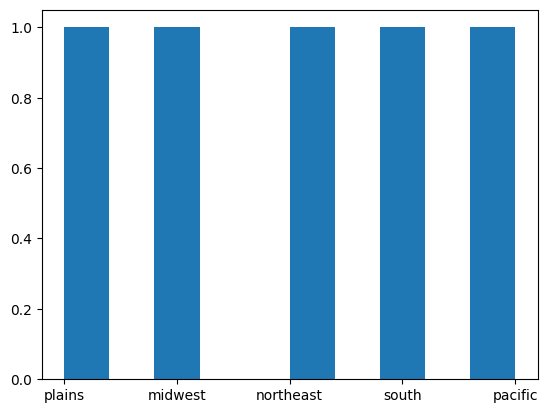

In [49]:
plains_df = df[df['region'] == 'plains']
midwest_df = df[df['region'] == 'midwest']
northeast_df = df[df['region'] == 'northeast']
south_df = df[df['region'] == 'south']
pacific_df = df[df['region'] == 'pacific']

loan_by_region = {'plains':plains_df['loan_amount'].median(),
          'midwest':midwest_df['loan_amount'].median(),
          'northeast':northeast_df['loan_amount'].median(),
         'south':south_df['loan_amount'].median(),
         'pacific':pacific_df['loan_amount'].median()}


plt.hist(loan_by_region,label = ['test1','test2','test3','test4','test5'])

In [52]:

i = 0

while i < pacific_df['loan_amount'].median():

    median_amounts.append('pacific')

    i+=1


(array([15000.,     0., 15000.,     0.,     0., 14000.,     0., 14000.,
            0., 15000.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

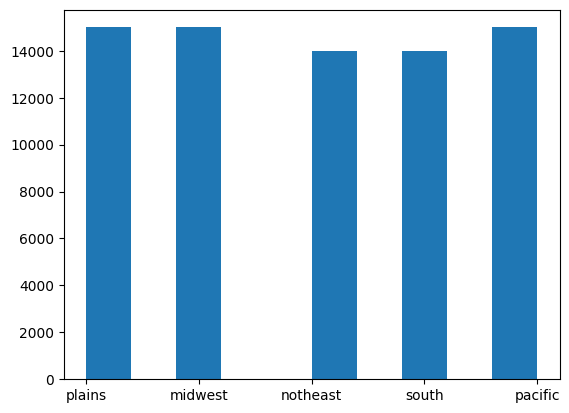

In [54]:
plt.hist(median_amounts)